# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model'  # where the outputs of this notebook will be saved

In [3]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_shared_revised.csv'))
summary    = pd.read_csv(os.path.join(results_path, 'fit_summary_shared_revised.csv'))

In [4]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

In [5]:
param_short = parameters.iloc[:900]

# Posteriors

In [6]:
posteriors

,"beta[1,1]","beta[2,1]","beta[3,1]","beta[4,1]","beta[5,1]","beta[1,2]","beta[2,2]","beta[3,2]","beta[4,2]","beta[5,2]",...,"beta[1,4]","beta[2,4]","beta[3,4]","beta[4,4]","beta[5,4]","beta[1,5]","beta[2,5]","beta[3,5]","beta[4,5]","beta[5,5]"
0,-0.765527,-0.260241,0.723316,0.880719,-0.166593,-0.389637,0.570236,-0.135351,0.498534,0.052757,...,-0.328292,0.282157,0.657681,0.292521,-0.078229,0.150645,0.351454,0.450076,0.097130,0.145485
1,-0.917010,-0.372873,0.912745,0.420295,0.262984,-0.284245,0.660314,-0.060090,0.249914,-0.161167,...,-0.252545,-0.149872,-0.216154,0.624387,0.207880,-0.164104,0.196985,0.561816,0.045085,-0.303639
2,-0.393573,-0.302602,0.334868,0.771745,0.076760,-0.289697,0.673628,-0.328673,0.264463,-0.061561,...,-0.033734,-0.213372,0.531514,0.082322,0.089716,-0.463409,0.306404,0.707031,0.207714,0.137524
3,-0.097784,0.444572,0.059231,0.611717,-0.280112,-0.316411,-0.638046,0.676410,0.283705,0.098084,...,-0.241240,0.402825,-0.279118,-0.007610,-0.622778,-0.212992,-0.406637,-0.641996,0.140382,0.152417
4,-0.641871,-0.084189,0.568076,0.357966,-0.221401,-0.310553,-0.202260,-0.328146,0.190234,-0.047770,...,-0.194790,-0.303797,0.118629,0.101513,-0.415347,-0.099474,-0.362537,-0.208663,-0.010256,0.132645
5,-0.044329,-0.604144,-0.614313,0.611843,-0.243954,-0.427339,0.107429,0.197912,0.368143,0.083967,...,0.093698,-0.048006,-0.158875,0.306268,-0.027671,-0.182210,-0.537559,-0.149216,0.323971,0.088233
6,-0.791204,0.605062,0.689829,0.329441,-0.105265,-0.030153,-0.047121,-0.167732,0.272209,-0.090926,...,-0.462044,-0.005101,0.387007,-0.145495,-0.261662,-0.240496,0.511633,0.188198,-0.010285,0.059169
7,-0.638207,0.250119,0.216296,0.228911,-0.072629,-0.019003,-0.144120,-0.442510,0.176118,-0.226152,...,-0.367427,-0.234529,0.148190,-0.342946,-0.241121,-0.383241,0.144496,-0.200574,-0.085527,0.415982
8,-0.611795,0.099453,0.212553,0.262878,-0.174850,-0.099139,-0.266734,-0.420921,0.276275,-0.234897,...,-0.404513,-0.234445,0.327179,-0.328474,-0.358497,-0.446592,0.072093,-0.371828,0.025735,0.375608
9,-0.270081,0.283182,0.138307,0.337778,-0.227538,-0.153234,-0.054444,-0.321666,0.260955,-0.267790,...,-0.236569,-0.429062,0.066622,-0.157273,-0.196303,-0.321346,-0.076633,0.152586,-0.093438,0.296249


In [7]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3'])
figsize      = (18, 18)
alpha        = 0.4

In [8]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


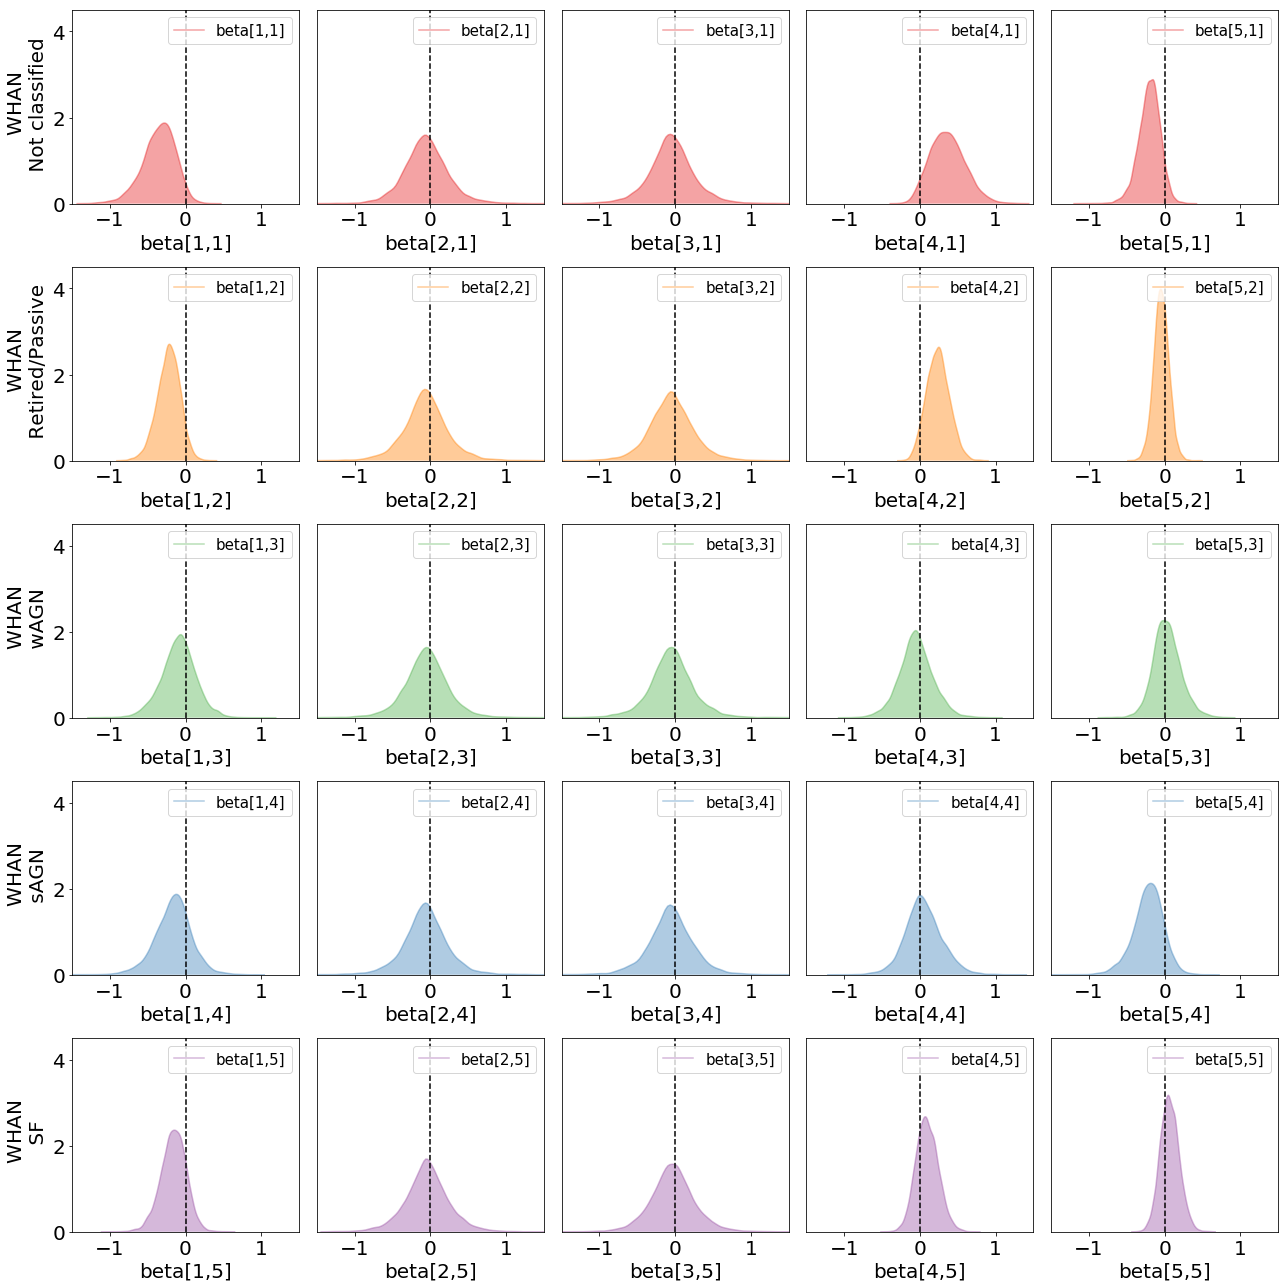

In [9]:
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.legend(loc='upper right', fontsize=15)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.xlabel(r"%s" % str(name_temp), fontsize=20)
        plt.tick_params('both', labelsize='20')
        plt.xlim([-1.5,1.5])
        plt.ylim([0,4.5])      
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
        elif (each_class!=0): 
            plot_temp.yaxis.set_visible(False)            
        position+=1

plt.tight_layout()
plt.savefig(os.path.join(results_path, '25betas_shared_revised.png'), bbox_inch='tight')
plt.savefig(os.path.join(results_path, '25betas_shared_revised.pdf'), bbox_inch='tight')
plt.show()

# Simplifying the probabilities' dataframe

In [10]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_shared_revised.csv'))

In [11]:
entire_fit.keys()

Index(['chain', 'draw', 'warmup', 'beta[1,1]', 'beta[2,1]', 'beta[3,1]',
       'beta[4,1]', 'beta[5,1]', 'beta[1,2]', 'beta[2,2]',
       ...
       'eta05[898]', 'eta05[899]', 'eta05[900]', 'lp__', 'accept_stat__',
       'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object', length=9037)

In [12]:
header = np.array(entire_fit.keys())

In [13]:
prob_keys = []
for i in header:
    if i[0:4]=='prob':
        prob_keys.append(i)
    else:
        continue

In [14]:
probabilities = entire_fit[prob_keys]

In [15]:
probabilities

,prob01[1],prob01[2],prob01[3],prob01[4],prob01[5],prob01[6],prob01[7],prob01[8],prob01[9],prob01[10],...,prob05[891],prob05[892],prob05[893],prob05[894],prob05[895],prob05[896],prob05[897],prob05[898],prob05[899],prob05[900]
0,0.007185,0.007167,0.007152,0.007140,0.007130,0.007124,0.007121,0.007121,0.007123,0.007129,...,0.843701,0.845316,0.846950,0.848603,0.850275,0.851964,0.853669,0.855390,0.857126,0.858876
1,0.542963,0.541981,0.541129,0.540407,0.539816,0.539354,0.539023,0.538822,0.538751,0.538811,...,0.111678,0.112799,0.113962,0.115169,0.116420,0.117716,0.119059,0.120449,0.121887,0.123375
2,0.115254,0.114820,0.114407,0.114015,0.113643,0.113292,0.112961,0.112650,0.112359,0.112088,...,0.791889,0.794374,0.796903,0.799474,0.802085,0.804735,0.807420,0.810140,0.812892,0.815674
3,0.011748,0.011838,0.011928,0.012020,0.012113,0.012207,0.012302,0.012398,0.012496,0.012595,...,0.731048,0.727904,0.724664,0.721325,0.717888,0.714349,0.710708,0.706963,0.703113,0.699157
4,0.023708,0.023709,0.023718,0.023734,0.023758,0.023789,0.023828,0.023875,0.023929,0.023991,...,0.657857,0.655809,0.653729,0.651616,0.649469,0.647289,0.645076,0.642828,0.640547,0.638232
5,0.015871,0.015687,0.015500,0.015310,0.015117,0.014921,0.014722,0.014521,0.014318,0.014113,...,0.747960,0.745840,0.743693,0.741517,0.739312,0.737079,0.734817,0.732526,0.730205,0.727855
6,0.063787,0.064509,0.065264,0.066051,0.066872,0.067728,0.068619,0.069546,0.070511,0.071514,...,0.598852,0.601569,0.604305,0.607060,0.609835,0.612628,0.615439,0.618268,0.621115,0.623978
7,0.123127,0.123646,0.124180,0.124730,0.125296,0.125878,0.126475,0.127089,0.127720,0.128366,...,0.919215,0.919187,0.919150,0.919105,0.919052,0.918989,0.918919,0.918839,0.918751,0.918654
8,0.048737,0.048840,0.048950,0.049066,0.049187,0.049315,0.049449,0.049588,0.049734,0.049886,...,0.910295,0.909966,0.909619,0.909254,0.908869,0.908465,0.908041,0.907598,0.907135,0.906652
9,0.034962,0.035137,0.035315,0.035496,0.035681,0.035870,0.036063,0.036259,0.036459,0.036663,...,0.828011,0.828132,0.828266,0.828411,0.828569,0.828740,0.828923,0.829118,0.829325,0.829544


In [16]:
probabilities_transposed = probabilities.T

In [17]:
print(probabilities_transposed.columns)

RangeIndex(start=0, stop=9000, step=1)


In [18]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

9000


In [19]:
probabilities_transposed.columns = new_header

In [20]:
probabilities_transposed

,itr0,itr1,itr2,itr3,itr4,itr5,itr6,itr7,itr8,itr9,...,itr8990,itr8991,itr8992,itr8993,itr8994,itr8995,itr8996,itr8997,itr8998,itr8999
prob01[1],0.007185,0.542963,0.115254,0.011748,0.023708,0.015871,0.063787,0.123127,0.048737,0.034962,...,0.164773,0.185609,0.137863,0.135470,0.042333,0.063833,0.073445,0.033257,0.035263,0.146300
prob01[2],0.007167,0.541981,0.114820,0.011838,0.023709,0.015687,0.064509,0.123646,0.048840,0.035137,...,0.164451,0.185298,0.137646,0.135298,0.042217,0.063925,0.072972,0.033472,0.034998,0.147225
prob01[3],0.007152,0.541129,0.114407,0.011928,0.023718,0.015500,0.065264,0.124180,0.048950,0.035315,...,0.164130,0.184992,0.137443,0.135096,0.042102,0.064010,0.072504,0.033681,0.034740,0.148140
prob01[4],0.007140,0.540407,0.114015,0.012020,0.023734,0.015310,0.066051,0.124730,0.049066,0.035496,...,0.163811,0.184692,0.137253,0.134866,0.041989,0.064088,0.072042,0.033883,0.034490,0.149043
prob01[5],0.007130,0.539816,0.113643,0.012113,0.023758,0.015117,0.066872,0.125296,0.049187,0.035681,...,0.163494,0.184397,0.137076,0.134608,0.041878,0.064160,0.071586,0.034079,0.034246,0.149936
prob01[6],0.007124,0.539354,0.113292,0.012207,0.023789,0.014921,0.067728,0.125878,0.049315,0.035870,...,0.163178,0.184108,0.136913,0.134321,0.041767,0.064225,0.071137,0.034268,0.034009,0.150818
prob01[7],0.007121,0.539023,0.112961,0.012302,0.023828,0.014722,0.068619,0.126475,0.049449,0.036063,...,0.162863,0.183824,0.136762,0.134005,0.041659,0.064283,0.070692,0.034450,0.033779,0.151688
prob01[8],0.007121,0.538822,0.112650,0.012398,0.023875,0.014521,0.069546,0.127089,0.049588,0.036259,...,0.162550,0.183546,0.136625,0.133661,0.041551,0.064334,0.070254,0.034626,0.033556,0.152547
prob01[9],0.007123,0.538751,0.112359,0.012496,0.023929,0.014318,0.070511,0.127720,0.049734,0.036459,...,0.162239,0.183273,0.136501,0.133289,0.041445,0.064379,0.069821,0.034794,0.033339,0.153395
prob01[10],0.007129,0.538811,0.112088,0.012595,0.023991,0.014113,0.071514,0.128366,0.049886,0.036663,...,0.161929,0.183006,0.136390,0.132889,0.041341,0.064416,0.069394,0.034956,0.033129,0.154230


In [21]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [22]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
shrinked_df = shrinked_temp.T
shrinked_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
prob01[1],9000.0,0.076160,0.090509,0.000004,0.001286,0.015047,0.043257,0.101912,0.329427,0.732429
prob01[2],9000.0,0.076087,0.090423,0.000004,0.001282,0.015062,0.043174,0.101848,0.329138,0.733090
prob01[3],9000.0,0.076013,0.090337,0.000004,0.001283,0.015048,0.043103,0.101778,0.328827,0.733722
prob01[4],9000.0,0.075938,0.090250,0.000004,0.001278,0.015016,0.043095,0.101563,0.328225,0.734325
prob01[5],9000.0,0.075862,0.090163,0.000004,0.001273,0.015035,0.042959,0.101437,0.328168,0.734899
prob01[6],9000.0,0.075785,0.090076,0.000004,0.001280,0.015000,0.042966,0.101292,0.328142,0.735444
prob01[7],9000.0,0.075708,0.089989,0.000004,0.001276,0.014967,0.042772,0.101267,0.327488,0.735960
prob01[8],9000.0,0.075630,0.089901,0.000004,0.001273,0.014931,0.042745,0.101015,0.327136,0.736448
prob01[9],9000.0,0.075551,0.089814,0.000004,0.001278,0.014925,0.042715,0.100787,0.327028,0.736907
prob01[10],9000.0,0.075472,0.089726,0.000004,0.001282,0.014902,0.042645,0.100600,0.326544,0.737338


In [23]:
print(shrinked_df.values.shape, parameters.shape)

(4500, 10) (4500, 2)


In [24]:
loc = shrinked_df.iloc[0, :].size
print(loc)

10


In [25]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [26]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [27]:
shrinked_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
prob01[1],9000.0,0.076160,0.090509,0.000004,0.001286,0.015047,0.043257,0.101912,0.329427,0.732429,9.729482,0.067940
prob01[2],9000.0,0.076087,0.090423,0.000004,0.001282,0.015062,0.043174,0.101848,0.329138,0.733090,9.729482,0.084889
prob01[3],9000.0,0.076013,0.090337,0.000004,0.001283,0.015048,0.043103,0.101778,0.328827,0.733722,9.729482,0.101837
prob01[4],9000.0,0.075938,0.090250,0.000004,0.001278,0.015016,0.043095,0.101563,0.328225,0.734325,9.729482,0.118786
prob01[5],9000.0,0.075862,0.090163,0.000004,0.001273,0.015035,0.042959,0.101437,0.328168,0.734899,9.729482,0.135734
prob01[6],9000.0,0.075785,0.090076,0.000004,0.001280,0.015000,0.042966,0.101292,0.328142,0.735444,9.729482,0.152683
prob01[7],9000.0,0.075708,0.089989,0.000004,0.001276,0.014967,0.042772,0.101267,0.327488,0.735960,9.729482,0.169632
prob01[8],9000.0,0.075630,0.089901,0.000004,0.001273,0.014931,0.042745,0.101015,0.327136,0.736448,9.729482,0.186580
prob01[9],9000.0,0.075551,0.089814,0.000004,0.001278,0.014925,0.042715,0.100787,0.327028,0.736907,9.729482,0.203529
prob01[10],9000.0,0.075472,0.089726,0.000004,0.001282,0.014902,0.042645,0.100600,0.326544,0.737338,9.729482,0.220478


In [28]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_revised.csv'))

In [29]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [30]:
zu = np.unique(prob01['LOG_STELLAR_MASS'].values)

In [31]:
subset = prob01[prob01['LOG_STELLAR_MASS'].values==zu[6]]

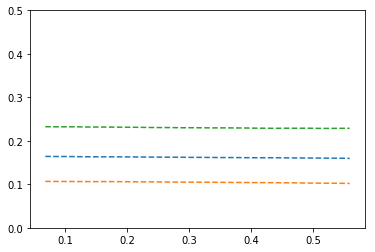

In [32]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,0.5])
plt.show()

In [33]:
np.unique(prob01['Z'].values)

array([0.06794   , 0.08488862, 0.10183724, 0.11878586, 0.13573448,
       0.1526831 , 0.16963172, 0.18658034, 0.20352897, 0.22047759,
       0.23742621, 0.25437483, 0.27132345, 0.28827207, 0.30522069,
       0.32216931, 0.33911793, 0.35606655, 0.37301517, 0.38996379,
       0.40691241, 0.42386103, 0.44080966, 0.45775828, 0.4747069 ,
       0.49165552, 0.50860414, 0.52555276, 0.54250138, 0.55945   ])

In [34]:
subset = prob01[prob01['Z']<0.07]

In [35]:
subset

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
prob01[1],9000.0,0.076160,0.090509,0.000004,0.001286,0.015047,0.043257,0.101912,0.329427,0.732429,9.729482,0.06794
prob01[31],9000.0,0.087164,0.091126,0.000015,0.002564,0.022237,0.056259,0.120297,0.337148,0.693706,9.796692,0.06794
prob01[61],9000.0,0.100227,0.091862,0.000059,0.004757,0.032169,0.072240,0.139899,0.347344,0.657384,9.863902,0.06794
prob01[91],9000.0,0.115564,0.092489,0.000207,0.008513,0.045121,0.090737,0.160504,0.356265,0.621838,9.931112,0.06794
prob01[121],9000.0,0.133337,0.092738,0.000669,0.014594,0.061830,0.112643,0.183837,0.361500,0.587731,9.998322,0.06794
prob01[151],9000.0,0.153626,0.092319,0.001979,0.024016,0.082476,0.137040,0.208054,0.371923,0.555613,10.065532,0.06794
prob01[181],9000.0,0.176379,0.090965,0.005355,0.038371,0.106756,0.164127,0.232541,0.382625,0.525902,10.132742,0.06794
prob01[211],9000.0,0.201384,0.088489,0.013221,0.057894,0.134502,0.192089,0.258382,0.394262,0.511732,10.199952,0.06794
prob01[241],9000.0,0.228240,0.084839,0.025565,0.082960,0.165251,0.221061,0.284777,0.407265,0.514802,10.267161,0.06794
prob01[271],9000.0,0.256360,0.080156,0.040500,0.113471,0.197917,0.251370,0.310951,0.421426,0.516967,10.334371,0.06794


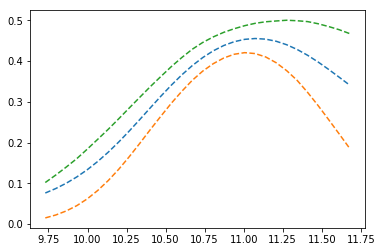

In [36]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()

# Checking automatic summary from STAN

In [37]:
summary_stan = pd.read_csv(os.path.join(results_path, 'fit_summary_shared_revised.csv'))

In [38]:
summary_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.0761,0.0016,0.0905,0.0012,0.0150,0.0432,0.1019,0.3297,2941,1.0013,0.067940,9.729482
1,prob01[2],0.0760,0.0016,0.0904,0.0012,0.0150,0.0431,0.1018,0.3296,2941,1.0013,0.084889,9.729482
2,prob01[3],0.0760,0.0016,0.0903,0.0012,0.0150,0.0431,0.1017,0.3292,2942,1.0013,0.101837,9.729482
3,prob01[4],0.0759,0.0016,0.0902,0.0012,0.0150,0.0431,0.1015,0.3283,2942,1.0013,0.118786,9.729482
4,prob01[5],0.0758,0.0016,0.0901,0.0012,0.0150,0.0429,0.1014,0.3282,2943,1.0013,0.135734,9.729482
5,prob01[6],0.0757,0.0016,0.0900,0.0012,0.0150,0.0429,0.1013,0.3283,2945,1.0013,0.152683,9.729482
6,prob01[7],0.0757,0.0016,0.0899,0.0012,0.0149,0.0427,0.1012,0.3278,2946,1.0013,0.169632,9.729482
7,prob01[8],0.0756,0.0016,0.0899,0.0012,0.0149,0.0427,0.1010,0.3277,2947,1.0013,0.186580,9.729482
8,prob01[9],0.0755,0.0016,0.0898,0.0012,0.0149,0.0427,0.1007,0.3275,2949,1.0013,0.203529,9.729482
9,prob01[10],0.0754,0.0016,0.0897,0.0012,0.0149,0.0426,0.1006,0.3276,2951,1.0013,0.220478,9.729482


In [39]:
prob01_stan = summary_stan.iloc[:900, :]

In [40]:
prob01_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.0761,0.0016,0.0905,0.0012,0.0150,0.0432,0.1019,0.3297,2941,1.0013,0.067940,9.729482
1,prob01[2],0.0760,0.0016,0.0904,0.0012,0.0150,0.0431,0.1018,0.3296,2941,1.0013,0.084889,9.729482
2,prob01[3],0.0760,0.0016,0.0903,0.0012,0.0150,0.0431,0.1017,0.3292,2942,1.0013,0.101837,9.729482
3,prob01[4],0.0759,0.0016,0.0902,0.0012,0.0150,0.0431,0.1015,0.3283,2942,1.0013,0.118786,9.729482
4,prob01[5],0.0758,0.0016,0.0901,0.0012,0.0150,0.0429,0.1014,0.3282,2943,1.0013,0.135734,9.729482
5,prob01[6],0.0757,0.0016,0.0900,0.0012,0.0150,0.0429,0.1013,0.3283,2945,1.0013,0.152683,9.729482
6,prob01[7],0.0757,0.0016,0.0899,0.0012,0.0149,0.0427,0.1012,0.3278,2946,1.0013,0.169632,9.729482
7,prob01[8],0.0756,0.0016,0.0899,0.0012,0.0149,0.0427,0.1010,0.3277,2947,1.0013,0.186580,9.729482
8,prob01[9],0.0755,0.0016,0.0898,0.0012,0.0149,0.0427,0.1007,0.3275,2949,1.0013,0.203529,9.729482
9,prob01[10],0.0754,0.0016,0.0897,0.0012,0.0149,0.0426,0.1006,0.3276,2951,1.0013,0.220478,9.729482


In [41]:
chosen_mass = np.unique(prob01_stan['LOG_STELLAR_MASS'].values)[12]

In [42]:
chosen_mass

10.536001172413792

In [43]:
subset_temp = prob01_stan[prob01_stan['LOG_STELLAR_MASS']==chosen_mass]

In [44]:
# subset_temp

In [45]:
# plt.plot(subset_temp['Z'], subset_temp['50%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['25%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['75%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['2.5%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['97.5%'], '--')
# plt.show()

In [46]:
# %matplotlib notebook

In [47]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(prob01_stan['Z'], prob01_stan['LOG_STELLAR_MASS'], prob01_stan['mean'], color='#a6611a', alpha=0.8, 
#                 linewidth=0, antialiased=False)
# ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='blue', alpha=0.8, 
#                 linewidth=0, antialiased=False)
# ax.set_xlabel("\n z", fontsize=14)
# ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
# ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
# for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
# ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
# ax.view_init(elev=22., azim=315)
# plt.show()

In [48]:
# prob01.boxplot(column='50%')

In [49]:
# prob01_stan.boxplot(column='50%')

# Last check to be 100% sure (for one class - class 1 - lineless)

In [50]:
m = 0.01
z = np.arange(0., 0.35, 0.01)
p = posteriors

In [51]:
# regression = []
regression_temp = []
for i in range(p['beta[1,1]'].values.size):
    for redshift in range(z.size):
        a = p['beta[1,1]'].values[i]
        b = p['beta[2,1]'].values[i] * z[redshift]
        c = p['beta[3,1]'].values[i] * z[redshift]**2
        d = p['beta[4,1]'].values[i] * m
        e = p['beta[5,1]'].values[i] * m**2
        
        f_x = np.sum([a,b,c,d,e])
        p_i = 1./(1+np.exp(-f_x))
        
        
        
        
        regression_temp.append([p_i, z[redshift], int(i)])
regression = np.array(regression_temp)

In [52]:
prob  = regression[:,0]
redsh = regression[:,1]
beta  = regression[:,2]

In [53]:
idx = np.where(beta<=10)

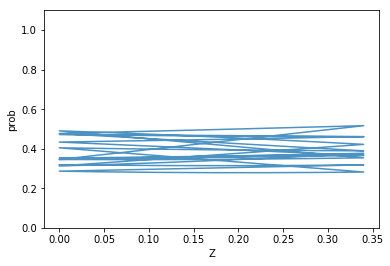

In [54]:
plt.plot(redsh[idx], prob[idx], '-', alpha=0.8)
plt.xlabel("Z")
plt.ylabel("prob")
plt.ylim([0,1.1])
plt.show()